In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
#Considerar os dados abaixo como exemplo
dados = pd.DataFrame({
 'X': [1, 2, 3, 4, 5],
 'y': [1.3, 1.8, 3.5, 4, 4.6]
})
dados.head(3)

,X,y
0,1,1.3
1,2,1.8
2,3,3.5


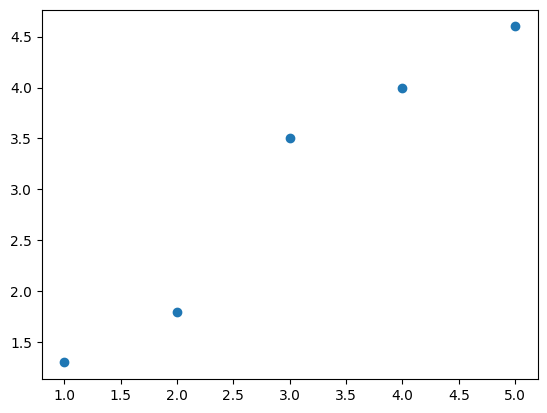

In [5]:
#Vizualizando os pontos graficamente
fig, ax = plt.subplots()
ax.scatter(dados.X, dados.y)
plt.show()

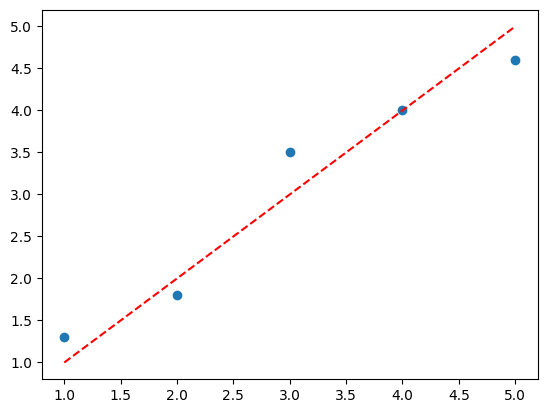

In [20]:
#Reta vermelha, onde fizemos y=X
dados['y_reta'] = dados.X

#Vizualizando os pontos graficamente e a rata passando pelos pontos
fig, ax = plt.subplots()
ax.scatter(dados.X, dados.y)
ax.plot(dados.X, dados.y_reta, '--r')
plt.show()

In [30]:
#Criando o regressor
reg = LinearRegression().fit(dados.X.values.reshape(-1, 1), dados.y)

In [31]:
#Visualizando o coeficiente angular
a = reg.coef_[0]

#Vizualizando o coeficiente linear
b = reg.intercept_

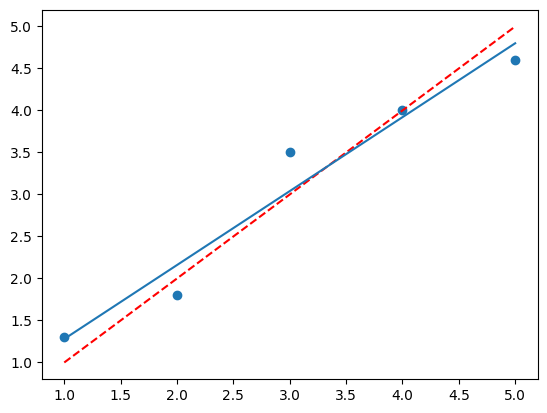

In [32]:
fig, ax = plt.subplots()
ax.scatter(dados.X, dados.y)
ax.plot(dados.X, dados.y_reta, '--r')

X = dados.X.values
y = a*X + b
ax.plot(X,y)
plt.show()

In [33]:
dados['y_pred'] = reg.predict(dados.X.values.reshape(-1, 1))

In [34]:
#Calcular o erro da reta vermelha da regressâo
dados['erro_reta'] = (dados.y - dados.y_reta)**2
dados['erro_pred'] = (dados.y - dados.y_pred)**2

print(dados)

   X    y  y_reta  erro_reta  y_pred  erro_pred
0  1  1.3       1       0.09    1.28     0.0004
1  2  1.8       2       0.04    2.16     0.1296
2  3  3.5       3       0.25    3.04     0.2116
3  4  4.0       4       0.00    3.92     0.0064
4  5  4.6       5       0.16    4.80     0.0400


In [35]:
dados[['erro_reta', 'erro_pred']].sum()

,0
erro_reta,0.540
erro_pred,0.388


In [36]:
#Colunas: [Área(m2), Quartos, garagem]
X = np.array([
   [50, 1, 1],
   [60, 2, 1],
   [80, 2, 2],
   [100, 3, 2],
   [120, 3, 2],
   [150, 4, 3],
   [200, 4, 3],
   [250, 5, 4],
   [300, 5, 4],
   [350, 6, 4]
])
y =  np.array([150, 200, 250, 320, 400, 500, 650, 800, 950, 1100])

In [37]:
#Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [38]:
#Coeficientes do modelo
print('Intercepto ', modelo.intercept_)
print('Coeficiente angular ', modelo.coef_)

Intercepto  -12.752944003846324
Coeficiente angular  [ 2.8643355  18.41143956  1.85892814]


In [39]:
#Exemplo de previsao
#Casa com 180m2, 3 quartos e 2 vagas da garagem
nova_casa = np.array([[180,3,2]])
previsao = modelo.predict(nova_casa)
print (f"Preço da nova casa {nova_casa}: R$ {previsao[0]:.2f} mil")

Preço da nova casa [[180   3   2]]: R$ 561.78 mil
